In [15]:
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
def diffusion_crack(n, ref_barrier = True, partial_block = True): 
    randoms = np.random.uniform(size=(n-1))
    pos = [0]
    for _ in range(n-1):
        if ((pos[-1] == -4) and (ref_barrier is True)): 
            pos.append(-3)
            continue
        if ((pos[-1] == 6) and (partial_block == True)): 
            if randoms[_] < 0.25: 
                pos.append(7)
            else: 
                pos.append(5)
            continue
        if randoms[_] < 0.5: 
            pos.append(pos[-1]-1)
        else: 
            pos.append(pos[-1]+1)
    return pos

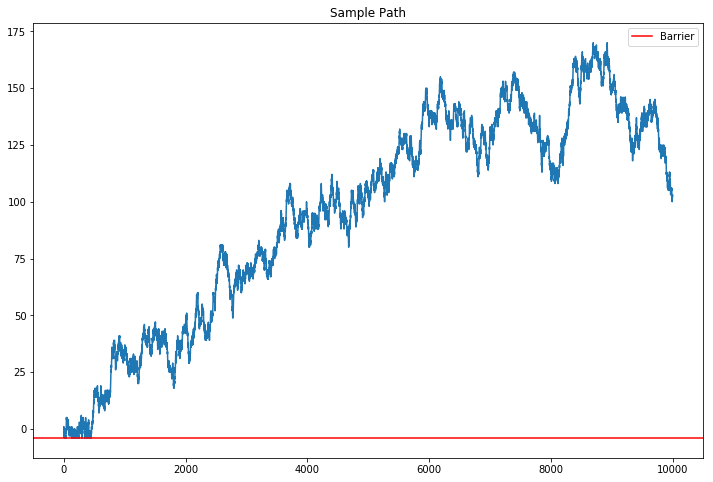

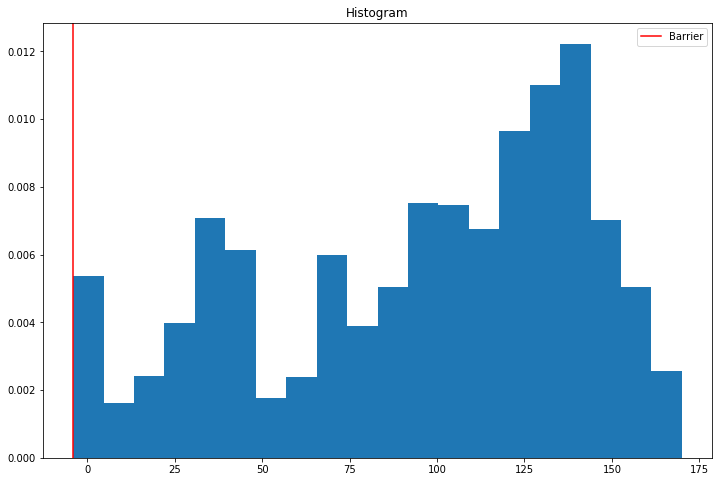

In [17]:
#Without crack

pos = diffusion_crack(10000, partial_block=False)
plt.figure(figsize=(12,8))
plt.plot(range(len(pos)), pos)
plt.title('Sample Path')
plt.axhline(y=-4, label='Barrier', color='r')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.hist(pos, density=True, bins=20)
plt.axvline(x=-4, label='Barrier', color='r')
plt.title('Histogram')
plt.legend()
plt.show()

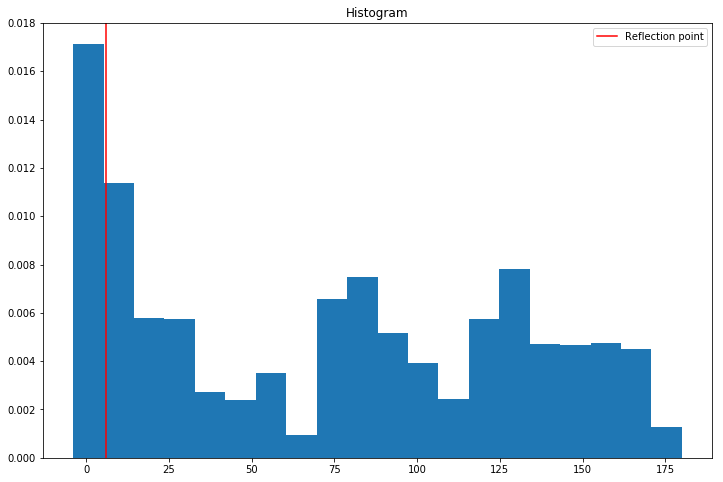

In [22]:
#With crack
pos = diffusion_crack(10000, partial_block=False)
plt.figure(figsize=(12,8))
plt.hist(pos, density=True, bins=20)
plt.title('Histogram')
plt.axvline(x=6, label='Reflection point', color='r')
plt.legend()
plt.show()

In [8]:
def rw_brownian(n, sigma): 
    pos_x = [0]
    pos_y = [0]
    for _ in range(n-1):
        angle = np.random.uniform(0, 2*np.pi)
        step = np.random.normal(loc=0, scale=sigma)
        pos_x.append(pos_x[-1] + np.cos(angle)*step)
        pos_y.append(pos_y[-1] + np.sin(angle)*step)
    return pos_x, pos_y    

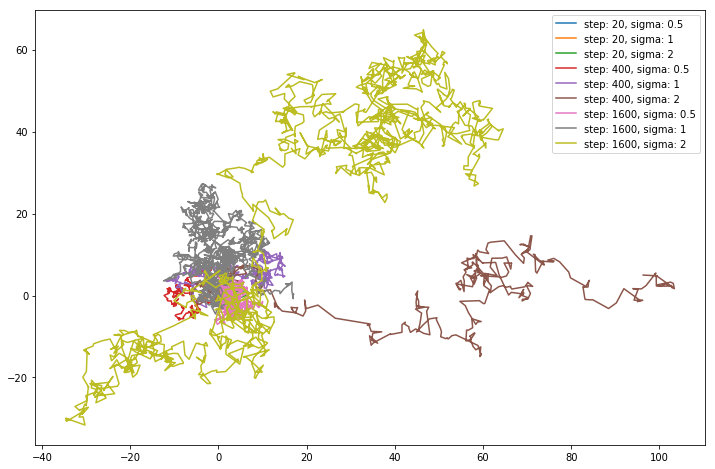

In [7]:
plt.figure(figsize=(12,8))

ns = [20, 400, 1600]
sigmas = [0.5, 1, 2]
for n in ns: 
    for sigma in sigmas: 
        pos_x, pos_y = rw_brownian(n, sigma)
        plt.plot(pos_x, pos_y, label="step: {}, sigma: {}".format(n, sigma))
plt.legend()
plt.show()

In [4]:
def rw_plane_with_hole(n):
    randoms_x = np.random.uniform(size=n-1)
    randoms_y = np.random.uniform(size=n-1)
    pos_x, pos_y = [0], [0]
    in_hole = 0
    for _ in range(n-1): 
        if ((pos_x[-1] == 20) or (pos_x[-1] == -20) or (pos_y[-1] == 20) or (pos_y[-1] == -20)):
            pos_x.append(pos_x[-1])
            pos_y.append(pos_y[-1])
            continue
        if (((pos_x[-1] == 13) or (pos_x[-1] == 14)) and ((pos_y[-1] == 7) or (pos_y[-1] == 8))):
            pos_x.append(pos_x[-1])
            pos_y.append(pos_y[-1])
            in_hole += 1
            continue
        if randoms_x[_] < 0.5: 
            pos_x.append(pos_x[-1]-1)
        else: 
            pos_x.append(pos_x[-1]+1)
        if randoms_y[_] < 0.5: 
            pos_y.append(pos_y[-1]-1)
        else: 
            pos_y.append(pos_y[-1]+1)
            
    return pos_x[-1], pos_y[-1], in_hole

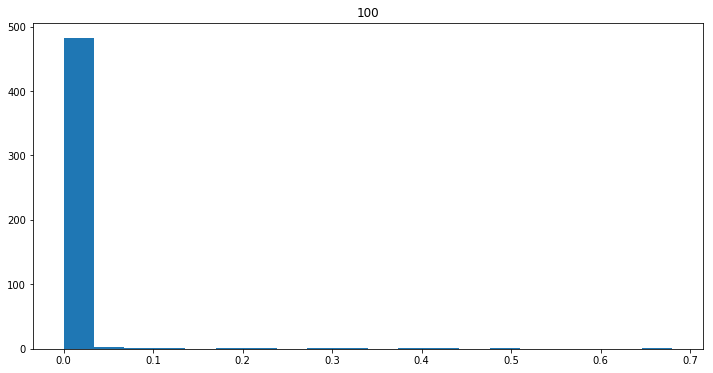

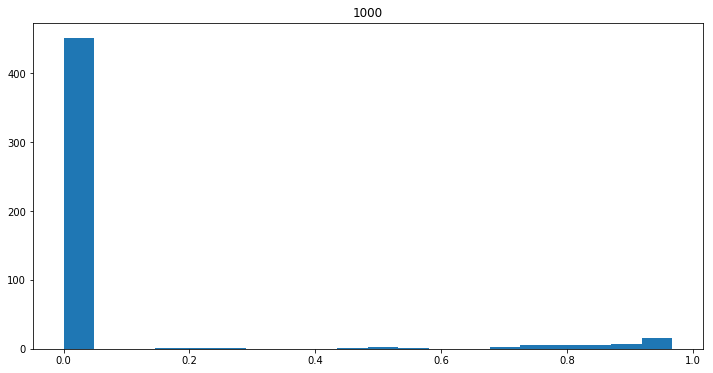

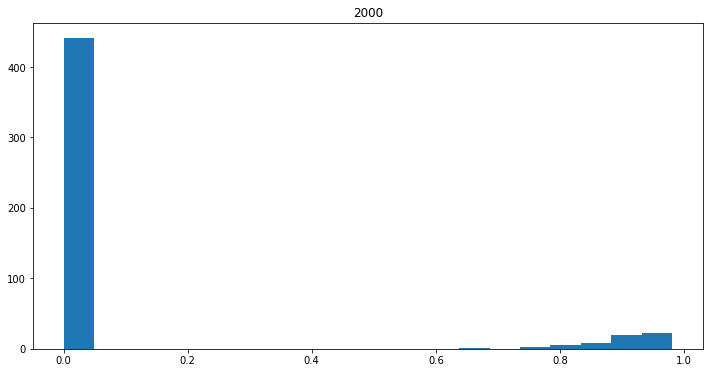

In [6]:
for n in [100, 1000, 2000]: 
    plt.figure(figsize=(12,6))
    stops_x, stops_y, in_holes = [], [], []
    for _ in range(500): 
        stop_x, stop_y, in_hole = rw_plane_with_hole(n)
        stops_x.append(stop_x)
        stops_y.append(stop_y)
        in_holes.append(in_hole/n)
    plt.hist(in_holes, bins=20)
    plt.title('Running')
    plt.show()